<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/IMDb_Movie_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df= pd.read_csv('/content/25k IMDb movie Dataset.csv')

In [ ]:
df.head()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24402 entries, 0 to 24401
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie title   24402 non-null  object
 1   Run Time      24402 non-null  object
 2   Rating        24402 non-null  object
 3   User Rating   24402 non-null  object
 4   Generes       24402 non-null  object
 5   Overview      24158 non-null  object
 6   Plot Kyeword  24402 non-null  object
 7   Director      24402 non-null  object
 8   Top 5 Casts   24402 non-null  object
 9   Writer        24402 non-null  object
 10  year          23624 non-null  object
 11  path          24402 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


In [68]:
df.describe()

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
count,24402,24402,24402,24402,24402,24158,24402,24402,24402,24402,23624,24402
unique,23922,1556,91,1684,746,23957,21546,11604,24211,15562,250,23922
top,Rage,not-released,no-rating,0,['Drama'],none,[],See company contact information,"['See producer', 'See preliminary cast']",See writer,-2022,/title/tt0114224/
freq,4,8475,1740,1740,943,142,1696,142,142,142,1201,4


In [69]:
df.groupby('movie title')['Rating'].max()

movie title
"Giliap"              6.3
#69 Samskar Colony    6.9
#Home                 8.9
#Horror                 3
#Like                 4.7
                     ... 
Ésimésac              6.1
Évolution             5.9
Órbita 9              5.9
Özgür Dünya           2.3
Última Parada 174     7.1
Name: Rating, Length: 23922, dtype: object

In [70]:
df['Earning'] = df['Run Time'].str.extract(r'\$(\d+(\.\d+)?)')
df['Earning'] = pd.to_numeric(df['Earning'])

ValueError: ignored

In [24]:
df2= pd.read_csv('/content/action.csv')
df2.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


In [25]:
df2.isnull().sum()

movie_id           0
movie_name         0
year            8259
certificate    38784
runtime        19922
genre              0
rating         23004
description        0
director        4633
director_id     4633
star            9240
star_id         7831
votes          23002
gross(in $)    49692
dtype: int64

In [28]:
#Remove columns
df2 = df2.loc[:, ~df2.columns.isin(['movie_id' ,'director_id', 'star_id'])]
df2

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
0,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...",204835.0,NaN
1,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We...",295119.0,NaN
2,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...",26220.0,NaN
3,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...",327858.0,NaN
4,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52447,Suicide 2,1999,NaN,54 min,"Action, Drama, Horror",NaN,Matt awakens after trying to end his own life ...,"Brandon Womeldorff, \nMatt Brassfield","Matt Hoffman, \nMatt Brassfield, \nBrandon Wom...",NaN,NaN
52448,Chaos,2023,NaN,NaN,"Action, Thriller",NaN,Add a Plot,"Aditi Prabhudeva, \nSiddu Moolimani, \nAkshith...",NaN,NaN,NaN
52449,Revolver Lily,NaN,NaN,NaN,"Action, Adventure",NaN,"Takes place in 1924 and centres on Yuri, who k...",Isao Yukisada,NaN,NaN,NaN
52450,The Wing,NaN,NaN,NaN,Action,NaN,The most secret and elite Special Forces unit ...,NaN,NaN,NaN,NaN


In [29]:
df2.dtypes

movie_name      object
year            object
certificate     object
runtime         object
genre           object
rating         float64
description     object
director        object
star            object
votes          float64
gross(in $)    float64
dtype: object

In [31]:
df2.head(10)

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
0,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...",204835.0,NaN
1,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We...",295119.0,NaN
2,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...",26220.0,NaN
3,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...",327858.0,NaN
4,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...",NaN,NaN
5,Ant-Man and the Wasp: Quantumania,2023,PG-13,125 min,"Action, Adventure, Comedy",6.6,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...",5396.0,NaN
6,Shotgun Wedding,2022,R,100 min,"Action, Comedy, Romance",5.4,Darcy and Tom gather their families for the ul...,Jason Moore,"Jennifer Lopez, \nJosh Duhamel, \nLenny Kravit...",21529.0,NaN
7,Bullet Train,2022,R,127 min,"Action, Comedy, Thriller",7.3,Five assassins aboard a swiftly-moving bullet ...,David Leitch,"Brad Pitt, \nJoey King, \nAaron Taylor-Johnson...",293635.0,NaN
8,All Quiet on the Western Front,2022,R,148 min,"Action, Drama, War",7.8,A young German soldier's terrifying experience...,Edward Berger,"Felix Kammerer, \nAlbrecht Schuch, \nAaron Hil...",139754.0,NaN
9,Top Gun: Maverick,2022,PG-13,130 min,"Action, Drama",8.3,"After thirty years, Maverick is still pushing ...",Joseph Kosinski,"Tom Cruise, \nJennifer Connelly, \nMiles Telle...",526016.0,NaN


In [32]:
df2.describe()

,rating,votes,gross(in $)
count,29448.000000,2.945000e+04,2.760000e+03
mean,5.697755,1.159384e+04,4.166888e+07
std,1.359132,7.039375e+04,8.033689e+07
min,1.100000,5.000000e+00,7.000000e+00
25%,4.800000,2.925000e+01,5.459445e+05
50%,5.800000,1.320000e+02,1.090365e+07
75%,6.600000,9.440000e+02,4.631759e+07
max,10.000000,2.675531e+06,9.366622e+08


In [35]:
df2['gross(in $)'].max(), df2['gross(in $)'].min()

(936662225.0, 7.0)

In [36]:
#movie with most gross income $
df2[df2['gross(in $)'].isin([936662225.0])]

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
188,Star Wars: Episode VII - The Force Awakens,2015,PG-13,138 min,"Action, Adventure, Sci-Fi",7.8,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, \nJohn Boyega, \nOscar Isaac, \n...",937714.0,936662225.0


In [37]:
#movie with least gross income $
df2[df2['gross(in $)'].isin([7.0])]


,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
2156,Ala Vaikunthapurramuloo,2020,Not Rated,163 min,"Action, Comedy, Drama",7.3,Fate plays a vital role in connecting the life...,Trivikram Srinivas,"Allu Arjun, \nPooja Hegde, \nTabu, \nJayaram",20415.0,7.0


In [42]:
df2['rating'].max(), df2['rating'].min()

(10.0, 1.1)

In [44]:
# movies with max rating

df2[df2['rating'].isin([10.0])]

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
7561,Invisible Hacker,2023,NaN,150 min,"Action, Sci-Fi",10.0,"""Invisible Hacker"" is an action-packed thrille...",Juwel Chowdhury,"Juwel Chowdhury, \nRicky Riyaf",14.0,NaN
15494,An Example of Teenage Boredom: The Movie,2022,NaN,46 min,"Action, Comedy, Western",10.0,It's the time of the Wild West. No. It's the t...,"Lachlan Mlinaric, \nRussell Stanley","William Cherry, \nIsaac Hutchins, \nLily Hutch...",5.0,NaN
25262,Love Mein,2022,NaN,60 min,"Action, Romance",10.0,This is 2016's love story where the only daugh...,Kumud Pant,"Kumud Pant, \nPooja Kimaya, \nAtul Sharma, \nB...",6.0,NaN


In [45]:
# movies with min rating

In [46]:
df2[df2['rating'].isin([1.1])]

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
8581,Troy: The Resurrection of Aeneas,2018,NaN,60 min,"Animation, Action, Adventure",1.1,The Journey of Aeneas after the Trojan War. Ba...,Aeneas Middleton,"Aeneas Middleton, \nHardley Davidson",153.0,NaN
9851,Badang,2018,NaN,105 min,"Action, Comedy, Fantasy",1.1,A male college student is often bullied by fri...,A. Razak Mohaideen,"Aliff Syukr, \nFasha Sandha, \nAzhari Mohd Zai...",782.0,NaN
13868,15/07: Break of Dawn,2021,NaN,95 min,"Action, Drama, War",1.1,"Dramatisation based on real events, brings tog...",Volkan Kocatürk,"Deniz Bolisik, \nBaran Bölükbasi, \nMelih Degi...",20548.0,NaN
16061,Vixen Highway 2006: It Came from Uranus!,2010,NaN,250 min,"Action, Horror, Thriller",1.1,Rock-star Bobby Barzell awaits a liver transpl...,"Tony Watt, \nVivita","Tony Watt, \nVivita, \nAmabelle Singson, \nJam...",141.0,NaN
24676,Browncoats: Independence War,2015,NaN,98 min,"Action, Sci-Fi, War",1.1,"A group of soldiers, on the last day of a War,...",Francis Hamada,"Beth Bemis, \nRichard Martinsen, \nWill James ...",729.0,NaN
43701,Mstitel chelovechestva,2016,NaN,66 min,"Action, Horror, Thriller",1.1,Add a Plot,"Andrey Gromov, \nNastya Zakharova","Nikita Derney, \nAndrey Gromov, \nOleg Zolotni...",33.0,NaN


In [47]:
df2['votes'].max(), df2['votes'].min()

(2675531.0, 5.0)

In [48]:
# the movies most voted
df2[df2['votes'].isin([2675531.0])]

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
33,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, \nHeath Ledger, \nAaron Eckhar...",2675531.0,534858444.0


In [49]:
# the movies least voted
df2[df2['votes'].isin([5.0])]

,movie_name,year,certificate,runtime,genre,rating,description,director,star,votes,gross(in $)
10936,The Imperfects,2020,NaN,NaN,Action,6.6,"In a broken world, a boy finds himself helples...",Giuliano Pighi,"David Warner, \nLydia Shreck, \nAadith Iyer, \...",5.0,NaN
12240,The Rush Call,2022,NaN,58 min,"Action, Drama",9.2,A corporate promotion pushes a suburban dad to...,Trey Riley,"Lacey Caroline, \nRachel Petsiavas, \nJeremy C...",5.0,NaN
14278,Lakhey,2022,NaN,135 min,"Action, Thriller",9.6,"Sameer Maharjan, born in a family Lakhey, is a...",Samrat Basnet,"Aaryan Adhikari, \nRakshya Budhathoki, \nSauga...",5.0,NaN
14571,La Muerte De Un Federal,2019,NaN,97 min,"Crime, Adventure, Action",9.6,Add a Plot,Alonso O. Lara,"Jesus Esparza, \nLuis Huizar, \nVianey Huizar,...",5.0,NaN
14615,Eenadu,2009,Not Rated,102 min,"Action, Crime, Drama",5.0,The police commissioner of Hyderabad confronts...,Chakri Toleti,"Kamal Haasan, \nVenkatesh Daggubati, \nSanthan...",5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
46571,Anak ng Kulafu,1947,NaN,NaN,"Action, Adventure",6.0,Add a Plot,Fausto S. Gonzalez,"Arturo del Mar, \nLupe Velasco, \nAmor La Vida...",5.0,NaN
46974,Jeremiah the Giver,2015,NaN,98 min,"Action, Fantasy, Sci-Fi",7.2,"Jeremiah is a lonely demigod, so one day he de...",Mashti Allan,"James Bawks, \nNora Earles, \nTimothy Hoover, ...",5.0,NaN
47164,Spider-Man 2: Broken Identity,2019,NaN,100 min,Action,4.2,Picking up after the events of Spider-Man 1. P...,Nathan McInnes,"Roman Cook, \nBrandon Denton, \nJorge Eadon-Da...",5.0,NaN
47483,Gokuaku kenpô,1974,NaN,79 min,Action,5.8,"In 1914, Sakuragi, a famous Karate master, get...",Shigehiro Ozawa,"Masashi Ishibashi, \nMiwako Onaya, \nGo Otsuka...",5.0,NaN


In [50]:
df2.director.unique()

array(['Ryan Coogler', 'James Cameron', 'Jean-François Richet', ...,
       'Aditi Prabhudeva, \nSiddu Moolimani, \nAkshith Shashikumar, \nShashikumar',
       'Isao Yukisada', 'D. Naveen Reddy'], dtype=object)

In [53]:
# top 10 director by number of movies
directors = df2['director']
directors.value_counts(ascending=False)
top10= directors.value_counts().iloc[0:10]
top10

Godfrey Ho               118
Pablo Santiago            78
Cesar Gallardo            76
Cheh Chang                69
Armando Garces            65
Cirio H. Santiago         63
Nilo Saez                 57
Artemio Marquez           54
Montazur Rahman Akbar     52
Francis Posadas           51
Name: director, dtype: int64

In [54]:
df_top10 = pd.DataFrame({'director': ['Godfrey Ho','Pablo Santiago','Cesar Gallardo','Cheh Chang','Armando Garces',
                         'Cirio H. Santiago','Nilo Saez','Artemio Marquez','Montazur Rahman Akbar','Francis Posadas'],
                        'number_movies': [118, 78, 76, 69, 65, 63, 57, 54, 52, 51]})

<Axes: xlabel='number_movies', ylabel='director'>

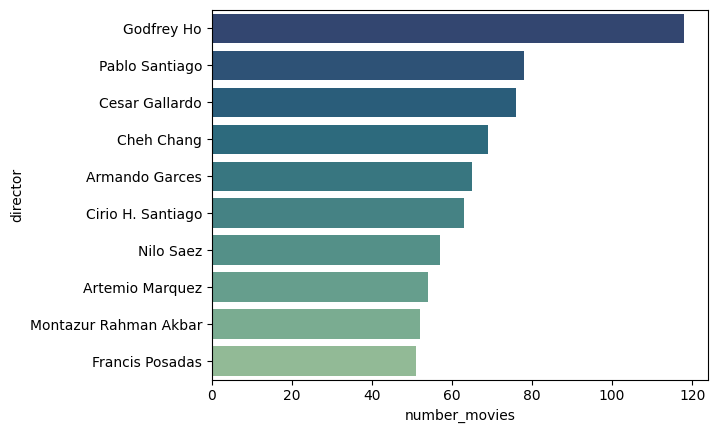

In [55]:
import seaborn as sns
sns.barplot(data=df_top10, x='number_movies', y='director', palette='crest_r')

In [56]:
# Top 10 most profitable movies
top10_proft = df2.sort_values(by=['gross(in $)'], ascending=False, inplace=False, ignore_index=True)

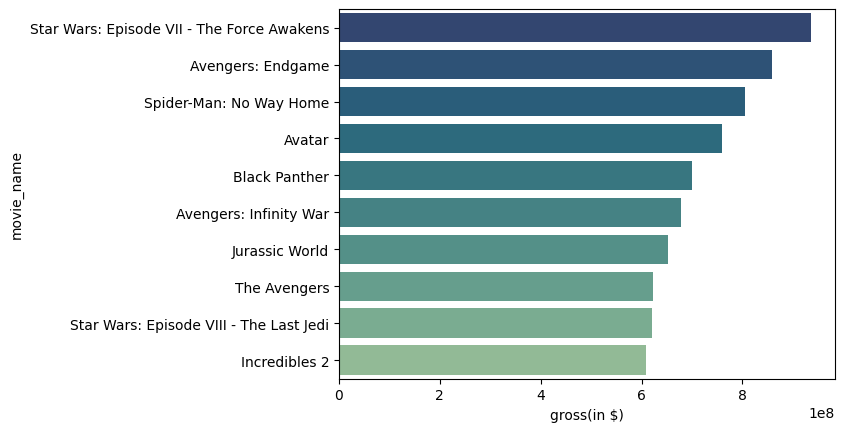

In [57]:
sns.barplot(data=top10_proft.loc[0:9], x='gross(in $)', y='movie_name', palette='crest_r');

In [58]:
# Top 10 years with most movies
number_movies_by_year = df2.year.value_counts(ascending=False)
top10 = number_movies_by_year.iloc[0:10]
top10

2017    1354
2022    1335
2018    1307
2019    1300
2016    1283
2021    1241
2015    1139
2014    1086
2013    1030
2020     996
Name: year, dtype: int64

In [59]:
df_top10_year = pd.DataFrame({'year': [2017, 2022, 2018, 2019, 2016, 2021, 2015, 2014, 2013, 2020],
                            'number_movies': [1354, 1335, 1307, 1300, 1283, 1241, 1139, 1086, 1030, 996]})

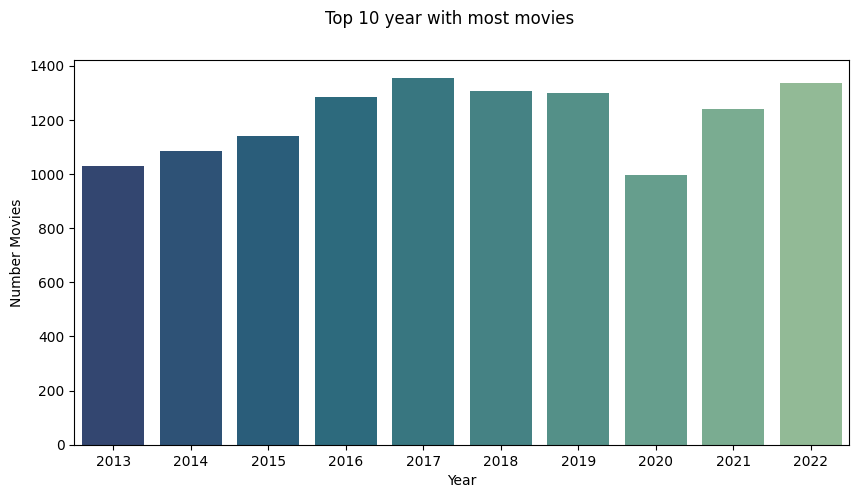

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_top10_year, x='year', y='number_movies', palette='crest_r')
plt.suptitle('Top 10 year with most movies')
plt.xlabel('Year')
plt.ylabel('Number Movies');